In [1]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/D&D/d&d-chart_data-volume-days-pageTypes.csv")

In [3]:
df

,days,03/31/2023,04/01/2023,04/02/2023,04/03/2023,04/04/2023,04/05/2023,04/06/2023,04/07/2023,04/08/2023,...,05/23/2023,05/24/2023,05/25/2023,05/26/2023,05/27/2023,05/28/2023,05/29/2023,05/30/2023,05/31/2023,06/01/2023
0,Online News,236,76,79,76,48,36,65,31,21,...,4,6,3,2,7,8,23,5,3,5
1,QQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YouTube,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Broadcast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Facebook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Legacy Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tumblr,77,449,522,394,291,377,268,264,552,...,100,81,98,73,87,133,61,92,103,51
7,Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,LinkedIn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blogs,11,2,3,8,5,4,1,1,1,...,1,0,0,1,1,0,0,0,0,0


In [4]:
engagement = df.copy()

In [5]:
#Transpose Matrix
engagement = engagement.transpose()

In [6]:
#Creating df for Regression Analysis
reg_engagement = df.transpose().copy()

In [7]:
#Calculate Sum of engagements from each source
row_sums = engagement.sum(axis=1)

# Add row sums as a new column
engagement['total'] = row_sums
#engagement['total'] = engagement.iloc[:,6] #Only Forums

#Drop first Row containing all sources
engagement = engagement.drop(engagement.index[0])

#Drop all columns except the 'total' column
columns_to_keep = [engagement.columns[-1]]
engagement = engagement[columns_to_keep]

engagement.index.name = 'date'
engagement.index = pd.to_datetime(engagement.index)

In [8]:
engagement

,total
date,
2023-03-31,671
2023-04-01,1188
2023-04-02,1261
2023-04-03,1064
2023-04-04,769
...,...
2023-05-28,156
2023-05-29,100
2023-05-30,107


In [9]:
bo = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/D&D/d&d-bo.csv")

In [10]:
bo = bo.dropna(axis=1)

In [11]:
bo

,date,revenue,to_date
0,03/31/2023,"$15,222,358","$15,222,358"
1,04/01/2023,"$12,910,476","$28,132,834"
2,04/02/2023,"$9,072,950","$37,205,784"
3,04/03/2023,"$2,776,969","$39,982,753"
4,04/04/2023,"$3,630,908","$43,613,661"
...,...,...,...
58,05/28/2023,"$46,017","$93,204,870"
59,05/29/2023,"$34,637","$93,239,507"
60,05/30/2023,"$14,022","$93,253,529"
61,05/31/2023,"$13,191","$93,266,720"


In [12]:
#Fixing 'date' column
#bo['date'] = pd.to_datetime(bo['date'] + '-2021', format='%b-%d-%Y')

#bo['date'] = bo['date'].dt.strftime('%m/%d/%Y')

# Making 'date' the index of the DataFrame
bo.set_index('date', inplace=True)

#Remove $ value
bo['revenue'] = bo['revenue'].str.replace('$', '')
bo['revenue'] = bo['revenue'].str.replace(',', '')

In [13]:
bo

,revenue,to_date
date,,
03/31/2023,15222358,"$15,222,358"
04/01/2023,12910476,"$28,132,834"
04/02/2023,9072950,"$37,205,784"
04/03/2023,2776969,"$39,982,753"
04/04/2023,3630908,"$43,613,661"
...,...,...
05/28/2023,46017,"$93,204,870"
05/29/2023,34637,"$93,239,507"
05/30/2023,14022,"$93,253,529"


In [14]:
engagement['total'] = pd.to_numeric(engagement['total'], errors='coerce')
bo['revenue'] = pd.to_numeric(bo['revenue'], errors='coerce')

In [15]:
engagement_ts = engagement.copy()
bo_ts = bo.copy()

In [16]:
engagement_ts

,total
date,
2023-03-31,671
2023-04-01,1188
2023-04-02,1261
2023-04-03,1064
2023-04-04,769
...,...
2023-05-28,156
2023-05-29,100
2023-05-30,107


In [17]:
# Combine your datasets into a single DataFrame 
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

In [18]:
combined_df

,total,revenue
date,,
2023-03-31,671,15222358
2023-04-01,1188,12910476
2023-04-02,1261,9072950
2023-04-03,1064,2776969
2023-04-04,769,3630908
...,...,...
2023-05-28,156,46017
2023-05-29,100,34637
2023-05-30,107,14022


In [19]:
#Making Data Stationary

#Differencing
#engagement_ts['total'] = engagement_ts['total'].diff()
#bo_ts['revenue'] = bo_ts['revenue'].diff()


#Taking Logarithm
#engagement_ts['total'] = np.log(engagement_ts['total'])
#bo_ts['revenue'] = bo_ts['revenue'].replace(-np.inf, np.nan)

# Dropping NA values after making it stationary
#engagement_ts.dropna(inplace=True)
#bo_ts.dropna(inplace=True)

In [20]:
#Checking Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Example usage
check_stationarity(engagement_ts['total'])
check_stationarity(bo_ts['revenue'])

ADF Statistic: -4.678526
p-value: 0.000092
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597
ADF Statistic: -2.088523
p-value: 0.249154
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


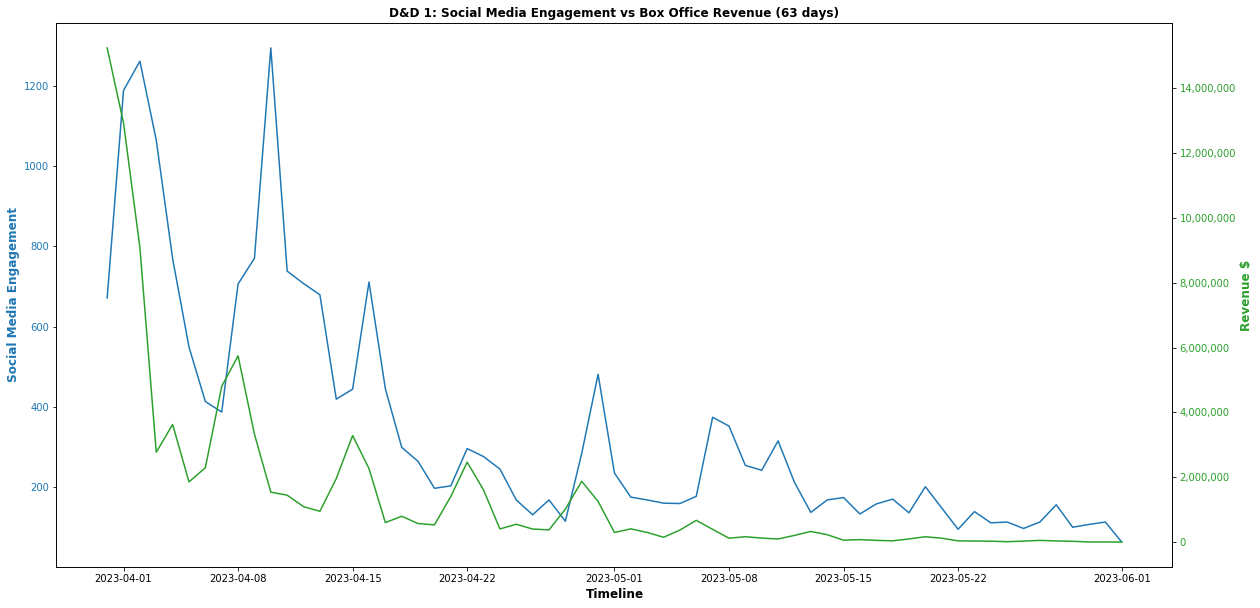

In [21]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Timeline',fontsize=12,fontweight='bold')
ax1.set_ylabel('Social Media Engagement',color=color,fontsize=12,fontweight='bold')
ax1.plot(combined_df.index,combined_df['total'],color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue $',color=color,fontsize=12,fontweight='bold')
ax2.plot(combined_df.index, combined_df['revenue'],color=color)
ax2.tick_params(axis='y',labelcolor=color)

y_labels = ['{:,.0f}'.format(y) for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)
plt.title('D&D 1: Social Media Engagement vs Box Office Revenue (63 days)',fontsize=12,fontweight='bold')

plt.grid(False)
plt.show()

In [21]:
correlation, _ = pearsonr(combined_df['total'], combined_df['revenue'])

In [22]:
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.6560508691916467


Maximum Pearson correlation coefficient: 0.8293822753834283
Lag associated with Maximum Pearson correlation coefficient: 1


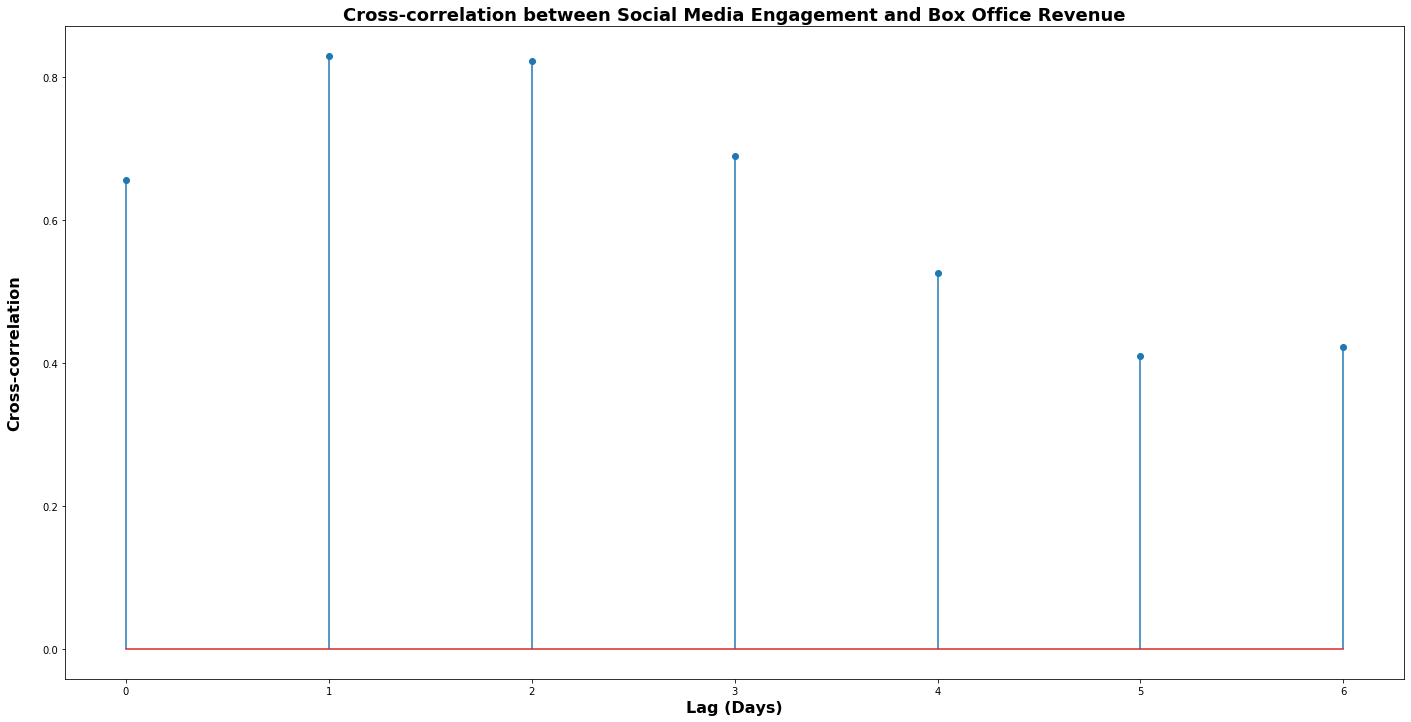

In [23]:
def cross_correlation(series1, series2, lag=0):
    return series1.corr(series2.shift(lag))

# Example usage:
lags = range(0, 7)  # Example lag values from 0 to 12
cross_corr_values = {}
for lag in lags:
    cross_corr_values[lag] = cross_correlation(combined_df['total'], combined_df['revenue'], lag)


max_pair = max(cross_corr_values.items(), key=lambda x: x[1])

#print(cross_corr_values.values())
#cross_corr_values = [cross_correlation(combined_df['total'], combined_df['revenue'], lag) for lag in lags]

print(f'Maximum Pearson correlation coefficient: {max_pair[1]}')
print(f'Lag associated with Maximum Pearson correlation coefficient: {max_pair[0]}')
# Plotting the cross-correlation values
import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg backend
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.stem(lags, cross_corr_values.values(), use_line_collection=True)
plt.xlabel('Lag (Days)',fontsize=16,fontweight='bold')
plt.ylabel('Cross-correlation',fontsize=16,fontweight='bold',labelpad=20)
plt.title('Cross-correlation between Social Media Engagement and Box Office Revenue',fontsize=18,fontweight='bold')
plt.show()

In [25]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combine your datasets into a single DataFrame for the Granger causality test
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

# Perform the Granger causality test
# The maxlag parameter is the maximum lag to test for, and the test 'ssr_chi2test' is one of the possible tests
granger_test_results = grangercausalitytests(combined_df, maxlag=15, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=52.4669 , p=0.0000  , df_denom=59, df_num=1
ssr based chi2 test:   chi2=55.1347 , p=0.0000  , df=1
likelihood ratio test: chi2=39.4438 , p=0.0000  , df=1
parameter F test:         F=52.4669 , p=0.0000  , df_denom=59, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.5995 , p=0.0000  , df_denom=56, df_num=2
ssr based chi2 test:   chi2=31.8060 , p=0.0000  , df=2
likelihood ratio test: chi2=25.5979 , p=0.0000  , df=2
parameter F test:         F=14.5995 , p=0.0000  , df_denom=56, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=12.3598 , p=0.0000  , df_denom=53, df_num=3
ssr based chi2 test:   chi2=41.9768 , p=0.0000  , df=3
likelihood ratio test: chi2=31.8241 , p=0.0000  , df=3
parameter F test:         F=12.3598 , p=0.0000  , df_denom=53, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=14.1023 , p=0.0000  , df_d

In [26]:
#Linear Regression Fit
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,X,VK,Review,Reddit,TvEyes Broadcast,4Chan
03/31/2023,236,0,0,0,0,0,77,0,0,11,23,0,324,0,0,0,0,0
04/01/2023,76,0,0,0,0,0,449,0,0,2,25,0,635,0,1,0,0,0
04/02/2023,79,0,0,0,0,0,522,0,0,3,24,0,633,0,0,0,0,0
04/03/2023,76,0,0,0,0,0,394,0,0,8,17,0,569,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/28/2023,8,0,0,0,0,0,133,0,0,0,3,0,12,0,0,0,0,0
05/29/2023,23,0,0,0,0,0,61,0,0,0,3,0,13,0,0,0,0,0
05/30/2023,5,0,0,0,0,0,92,0,0,0,4,0,6,0,0,0,0,0
05/31/2023,3,0,0,0,0,0,103,0,0,0,4,0,3,0,0,0,0,0


In [27]:
#Make first row as Columns
reg_engagement.columns = reg_engagement.iloc[0]

In [28]:
#Drop first row
reg_engagement = reg_engagement.drop(reg_engagement.index[0])

In [29]:
#Drop Columns (Content Sources where all values are 0)
reg_engagement = reg_engagement.loc[:, (reg_engagement != 0).any(axis=0)]

In [30]:
reg_engagement = reg_engagement.rename(columns={'days': 'date'})

In [31]:
reg_engagement

days,Online News,Tumblr,Blogs,Forums,X,Review
03/31/2023,236,77,11,23,324,0
04/01/2023,76,449,2,25,635,1
04/02/2023,79,522,3,24,633,0
04/03/2023,76,394,8,17,569,0
04/04/2023,48,291,5,20,404,1
...,...,...,...,...,...,...
05/28/2023,8,133,0,3,12,0
05/29/2023,23,61,0,3,13,0
05/30/2023,5,92,0,4,6,0
05/31/2023,3,103,0,4,3,0


In [32]:
shift = -1 #Based on Lag

In [33]:
bo_series = bo['revenue']

In [34]:
bo_series_shifted = bo_series.shift(-1)

In [35]:
bo_series_shifted = bo_series_shifted[:shift]

In [36]:
bo_series_shifted

date
03/31/2023    12910476.0
04/01/2023     9072950.0
04/02/2023     2776969.0
04/03/2023     3630908.0
04/04/2023     1863667.0
                 ...    
05/27/2023       46017.0
05/28/2023       34637.0
05/29/2023       14022.0
05/30/2023       13191.0
05/31/2023       10306.0
Name: revenue, Length: 62, dtype: float64

In [37]:
reg_engagement = reg_engagement.iloc[:shift, :]

In [38]:
reg_engagement

days,Online News,Tumblr,Blogs,Forums,X,Review
03/31/2023,236,77,11,23,324,0
04/01/2023,76,449,2,25,635,1
04/02/2023,79,522,3,24,633,0
04/03/2023,76,394,8,17,569,0
04/04/2023,48,291,5,20,404,1
...,...,...,...,...,...,...
05/27/2023,7,87,1,4,14,0
05/28/2023,8,133,0,3,12,0
05/29/2023,23,61,0,3,13,0
05/30/2023,5,92,0,4,6,0


In [39]:
reg_engagement = reg_engagement.astype(int)

In [40]:
reg_engagement

days,Online News,Tumblr,Blogs,Forums,X,Review
03/31/2023,236,77,11,23,324,0
04/01/2023,76,449,2,25,635,1
04/02/2023,79,522,3,24,633,0
04/03/2023,76,394,8,17,569,0
04/04/2023,48,291,5,20,404,1
...,...,...,...,...,...,...
05/27/2023,7,87,1,4,14,0
05/28/2023,8,133,0,3,12,0
05/29/2023,23,61,0,3,13,0
05/30/2023,5,92,0,4,6,0


In [41]:
bo_series_shifted

date
03/31/2023    12910476.0
04/01/2023     9072950.0
04/02/2023     2776969.0
04/03/2023     3630908.0
04/04/2023     1863667.0
                 ...    
05/27/2023       46017.0
05/28/2023       34637.0
05/29/2023       14022.0
05/30/2023       13191.0
05/31/2023       10306.0
Name: revenue, Length: 62, dtype: float64

In [42]:
# Prepare the features (X) and the target (y)
X = reg_engagement  # 'Reg Engagement' df as features
y = bo_series_shifted  # 'Revenue' series

# Reset index if necessary
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (for the intercept)
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit the OLS model
model = sm.OLS(y, X_scaled_with_const).fit()

# Get the regression report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     9.432
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           4.11e-07
Time:                        20:21:24   Log-Likelihood:                -970.96
No. Observations:                  62   AIC:                             1956.
Df Residuals:                      55   BIC:                             1971.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.259e+06   2.06e+05      6.097      

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
# Extract the coefficients (excluding the intercept) and sort them by their absolute values
coefficients = model.params.drop('const').abs().sort_values(ascending=False)

# Print the sorted coefficients to identify the top contributing features
print("\nTop Contributing Features:")
print(coefficients)


Top Contributing Features:
Blogs          550283.655131
X              541204.874869
Forums         476176.579413
Online News    275123.390064
Tumblr          66662.781267
Review          26437.311755
dtype: float64
